## Demographic Data for Areas Surrounding Busiest Subway Stations

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

###  NYC Demographic Data

We want to look at the demographics of the neighborhoods surrounding the busiest subway stations to determine which areas would be best to target for enagement.

We obtained demographic data for various areas, delineated by census tracts, from the U.S. Census Bureau American Community Survey, which (), via Kaggle.

Sources: https://www.kaggle.com/muonneutrino/new-york-city-census-data

In [12]:
# Read in csv file into dataframe
census_tracts = pd.read_csv('/Users/sunnajo/Downloads/nyc_census_tracts.csv')
census_tracts.head()

,CensusTract,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,...,2.9,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7
2,36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,...,1.4,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5
3,36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,...,8.6,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7
4,36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,...,3.0,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2


In [13]:
# Explore data
census_tracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CensusTract      2167 non-null   int64  
 1   County           2167 non-null   object 
 2   Borough          2167 non-null   object 
 3   TotalPop         2167 non-null   int64  
 4   Men              2167 non-null   int64  
 5   Women            2167 non-null   int64  
 6   Hispanic         2128 non-null   float64
 7   White            2128 non-null   float64
 8   Black            2128 non-null   float64
 9   Native           2128 non-null   float64
 10  Asian            2128 non-null   float64
 11  Citizen          2167 non-null   int64  
 12  Income           2101 non-null   float64
 13  IncomeErr        2101 non-null   float64
 14  IncomePerCap     2121 non-null   float64
 15  IncomePerCapErr  2121 non-null   float64
 16  Poverty          2125 non-null   float64
 17  ChildPoverty  

### Cleaning the data

In [17]:
# Clean column names
census_tracts.columns = census_tracts.columns.str.lower()
census_tracts.rename(columns={'censustract': 'census_tract',
                              'totalpop': 'total_pop',
                              'incomeerr': 'income_err',
                              'incomepercap': 'income_per_cap',
                              'incomepercaperr': 'income_per_cap_err',
                              'childpoverty': 'child_poverty',
                              'othertransp': 'other_transp',
                              'workathome': 'work_at_home',
                              'meancommute': 'mean_commute',
                              'privatework': 'private_work',
                              'publicwork': 'public_work',
                              'selfemployed': 'self_employed',
                              'familywork': 'family_work'}, inplace=True)

census_tracts.columns

Index(['census_tract', 'county', 'borough', 'total_pop', 'men', 'women',
       'hispanic', 'white', 'black', 'native', 'asian', 'citizen', 'income',
       'income_err', 'income_per_cap', 'income_per_cap_err', 'poverty',
       'child_poverty', 'professional', 'service', 'office', 'construction',
       'production', 'drive', 'carpool', 'transit', 'walk', 'other_transp',
       'work_at_home', 'mean_commute', 'employed', 'private_work',
       'public_work', 'self_employed', 'family_work', 'unemployment'],
      dtype='object')

In [19]:
# Calculate percentage of women in total population
census_tracts['pct_women'] = census_tracts['women'] / census_tracts['total_pop'] * 100
census_tracts.head()

,census_tract,county,borough,total_pop,men,women,hispanic,white,black,native,...,other_transp,work_at_home,mean_commute,employed,private_work,public_work,self_employed,family_work,unemployment,pct_women
0,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,7.399714
1,36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,...,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7,50.786600
2,36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,...,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5,51.039730
3,36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,...,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7,56.489199
4,36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,...,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2,53.454265


In [25]:
# Clean values in columns

# Identify which columns contain string values
census_tracts.dtypes

census_tract            int64
county                 object
borough                object
total_pop               int64
men                     int64
women                   int64
hispanic              float64
white                 float64
black                 float64
native                float64
asian                 float64
citizen                 int64
income                float64
income_err            float64
income_per_cap        float64
income_per_cap_err    float64
poverty               float64
child_poverty         float64
professional          float64
service               float64
office                float64
construction          float64
production            float64
drive                 float64
carpool               float64
transit               float64
walk                  float64
other_transp          float64
work_at_home          float64
mean_commute          float64
employed                int64
private_work          float64
public_work           float64
self_emplo

In [26]:
# Clean values in columns
cols = ['county', 'borough']

for col in cols:
    census_tracts[col] = census_tracts[col].str.strip()

census_tracts.head()

,census_tract,county,borough,total_pop,men,women,hispanic,white,black,native,...,other_transp,work_at_home,mean_commute,employed,private_work,public_work,self_employed,family_work,unemployment,pct_women
0,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,7.399714
1,36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,...,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7,50.786600
2,36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,...,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5,51.039730
3,36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,...,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7,56.489199
4,36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,...,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2,53.454265


In [27]:
# Filter out unpopulated areas
mask_pop = (census_tracts['total_pop'] != 0)
tracts_cleaned = census_tracts[mask_pop]

In [28]:
# Filter out target demographic variables
tracts_cleaned = tracts_cleaned.filter(['census_tract', 'county', 'borough', 'total_pop', 'pct_women', 'income', 
                                        'professional', 'transit'])
tracts_cleaned.columns

Index(['census_tract', 'county', 'borough', 'total_pop', 'pct_women', 'income',
       'professional', 'transit'],
      dtype='object')

We need to deal with missing/null values.

In [29]:
tracts_cleaned.isnull().sum()

census_tract     0
county           0
borough          0
total_pop        0
pct_women        0
income          27
professional     4
transit          4
dtype: int64

Determine if removing missing/null values will have significant effect on data

In [31]:
# Look at rows with missing information
missing = tracts_cleaned[tracts_cleaned.isna().any(axis=1)]
missing

,census_tract,county,borough,total_pop,pct_women,income,professional,transit
0,36005000100,Bronx,Bronx,7703,7.399714,NaN,NaN,NaN
7,36005002400,Bronx,Bronx,150,27.333333,NaN,63.7,100.0
15,36005003700,Bronx,Bronx,246,47.967480,NaN,17.7,79.2
63,36005011000,Bronx,Bronx,153,48.366013,NaN,30.5,44.2
206,36005028400,Bronx,Bronx,740,33.108108,NaN,3.4,35.6
227,36005031900,Bronx,Bronx,645,74.728682,NaN,20.8,11.6
337,36005050400,Bronx,Bronx,63,28.571429,NaN,32.4,67.6
349,36047001800,Kings,Brooklyn,2075,5.301205,NaN,NaN,NaN
896,36047070202,Kings,Brooklyn,16,43.750000,NaN,0.0,75.0
963,36047085200,Kings,Brooklyn,8,100.000000,NaN,0.0,0.0


In [33]:
# Calculate percentage of rows with missing data
missing_income_pct = tracts_cleaned['income'].isnull().sum() / tracts_cleaned['income'].shape[0] * 100
missing_prof_pct = tracts_cleaned['professional'].isnull().sum() / tracts_cleaned['professional'].shape[0] * 100
missing_transit_pct = tracts_cleaned['transit'].isnull().sum() / tracts_cleaned['transit'].shape[0] * 100

print(missing_income_pct)
print(missing_prof_pct)
print(missing_transit_pct)

1.268796992481203
0.18796992481203006
0.18796992481203006


In [35]:
# Since small % of data is missing (<1.5% for each variable), remove the missing/null values
tracts_cleaned.dropna(axis=0, inplace=True)
tracts_cleaned.isnull().sum()

census_tract    0
county          0
borough         0
total_pop       0
pct_women       0
income          0
professional    0
transit         0
dtype: int64

### Subway entrance coordinates data

We want to obtain the coordinates for the busiest subway stations. We found a data set from NYC Open Data that has the coordinates for subway station entrances in NYC.

Source: http://web.mta.info/developers/data/nyct/subway/StationEntrances.csv

In [36]:
# Read csv file into dataframe
subway_data = pd.read_csv('/Users/sunnajo/Downloads/station_entrances.csv')

In [ ]:
# Explore the data
subway_data.info()
subway_data.head(50)
subway_data.tail(50)

#### Clean the data

In [104]:
# Get rid of unnecessary columns
subway_cleaned = subway_data.filter(['Line', 'Station_Name', 'Station_Latitude', 'Station_Longitude'])
subway_cleaned.head()

,Line,Station_Name,Station_Latitude,Station_Longitude
0,Astoria,Ditmars Blvd,40.775036,-73.912034
1,Astoria,Ditmars Blvd,40.775036,-73.912034
2,Astoria,Ditmars Blvd,40.775036,-73.912034
3,Astoria,Ditmars Blvd,40.775036,-73.912034
4,Astoria,Astoria Blvd-Hoyt Av,40.770258,-73.917843


In [105]:
# Clean column names
subway_cleaned.columns = subway_cleaned.columns.str.lower()

# Get rid of duplicate rows
subway_cleaned.drop_duplicates(inplace=True)

# Clean column values
subway_cleaned['line'] = subway_cleaned['line'].str.strip()
subway_cleaned['station_name'] = subway_cleaned['station_name'].str.strip()

In [106]:
# Filter out busiest stations
mask_top = (subway_cleaned['station_name'] == 'Grand Central-42nd St') |\
(subway_cleaned['station_name'] == 'Times Square-42nd St') |\
(subway_cleaned['station_name'] == 'Times Square') |\
((subway_cleaned['station_name'] == '34th St') & (subway_cleaned['line'] == '6 Avenue')) |\
((subway_cleaned['station_name'] == '34th St') & (subway_cleaned['line'] == 'Broadway-7th Ave')) |\
((subway_cleaned['station_name'] == '34th St') & (subway_cleaned['line'] == '8 Avenue')) |\
(subway_cleaned['station_name'] == 'Union Square') |\
(subway_cleaned['station_name'] == '14th St-Union Square') |\
((subway_cleaned['station_name'] == '42nd St') & (subway_cleaned['line'] == '8 Avenue')) |\
(subway_cleaned['station_name'] == '23rd St') |\
(subway_cleaned['station_name'] == 'Fulton St') |\
((subway_cleaned['station_name'] == '86th St') & (subway_cleaned['line'] == 'Lexington')) |\
(subway_cleaned['station_name'] == '125th St') |\
(subway_cleaned['station_name'] == 'Canal St') |\
(subway_cleaned['station_name'] == 'Canal St (UL)') |\
(subway_cleaned['station_name'] == '59th St-Columbus Circle') |\
(subway_cleaned['station_name'] == '59th St') |\
(subway_cleaned['station_name'] == '96th St') |\
(subway_cleaned['station_name'] == 'Flushing-Main St')

top_stations = subway_cleaned[mask_top]
top_stations

,line,station_name,station_latitude,station_longitude
32,Broadway,23rd St,40.741303,-73.989344
36,Broadway,Union Square,40.735736,-73.990568
81,4 Avenue,59th St,40.641362,-74.017881
301,8 Avenue,125th St,40.811109,-73.952343
310,8 Avenue,96th St,40.791646,-73.964699
318,8 Avenue,59th St,40.768296,-73.981736
335,8 Avenue,42nd St,40.757308,-73.989735
339,8 Avenue,34th St,40.752287,-73.993391
342,8 Avenue,23rd St,40.745906,-73.998041
353,8 Avenue,Canal St,40.720824,-74.005229


In [107]:
# Reset indices
top_stations.reset_index(drop=True, inplace=True)
top_stations.head()

,line,station_name,station_latitude,station_longitude
0,Broadway,23rd St,40.741303,-73.989344
1,Broadway,Union Square,40.735736,-73.990568
2,4 Avenue,59th St,40.641362,-74.017881
3,8 Avenue,125th St,40.811109,-73.952343
4,8 Avenue,96th St,40.791646,-73.964699


Some stations have the same station name but are on different lines. Some of these stations house multiple subway lines and are the same station but some are actually different stations.

We needed to change the station names to reflect the names that we assigned to the busiest stations.

In [108]:
top_stations = top_stations\
.replace('Canal St (UL)', 'Canal St')\
.replace('Times Square', 'Times Square-42nd St')\
.replace('Grand Central', 'Grand Central-42nd St')\
.replace('Union Square', '14th St-Union Square')

top_stations['station_name'].unique()

array(['23rd St', '14th St-Union Square', '59th St', '125th St',
       '96th St', '42nd St', '34th St', 'Canal St', 'Fulton St',
       'Times Square-42nd St', '86th St', 'Flushing-Main St',
       '59th St-Columbus Circle', 'Grand Central-42nd St'], dtype=object)

In [109]:
# Rename 34th St-Penn Station and 34th St-Herald Square
top_stations.at[15,'station_name'] = '34th St-Penn Station'
top_stations.at[10, 'station_name'] = '34th St-Herald Square'

top_stations.head(16)

,line,station_name,station_latitude,station_longitude
0,Broadway,23rd St,40.741303,-73.989344
1,Broadway,14th St-Union Square,40.735736,-73.990568
2,4 Avenue,59th St,40.641362,-74.017881
3,8 Avenue,125th St,40.811109,-73.952343
4,8 Avenue,96th St,40.791646,-73.964699
5,8 Avenue,59th St,40.768296,-73.981736
6,8 Avenue,42nd St,40.757308,-73.989735
7,8 Avenue,34th St,40.752287,-73.993391
8,8 Avenue,23rd St,40.745906,-73.998041
9,8 Avenue,Canal St,40.720824,-74.005229


In [110]:
# Convert coordinates to numeric values
top_stations['station_latitude'] = pd.to_numeric(top_stations['station_latitude'], errors='ignore')
top_stations['station_longitude'] = pd.to_numeric(top_stations['station_longitude'], errors='ignore')

We see that there are multiple latitudes and longitudes for the same station in some cases. Some of the stations have multiple subway entrances. We accounted for this by obtaining the averages of the coordinates for the entrances for each station.

In [111]:
# Group data according to station and calculate means of latitudes and longitudes for entrances for each station
top_stations = top_stations.groupby('station_name').mean().reset_index()
top_stations.head()

,station_name,station_latitude,station_longitude
0,125th St,40.809645,-73.948451
1,14th St-Union Square,40.735066,-73.990416
2,23rd St,40.742806,-73.992492
3,34th St,40.752287,-73.993391
4,34th St-Herald Square,40.749719,-73.987823


Now that we have the coordinates for the busiest stations, we need to combine this data with the demographic data to be able to determine the demographics of the areas surrounding the subway stations.  
We can merge the dataframes on the census tract code, which is a unique code for each census tract.

In [112]:
# Create a dictionary with station name and corresponding census tract code
tracts_dict = {'34th St-Penn Station': '010100', 'Grand Central-42nd St': '009200',
               '34th St-Herald Square': '007600', '14th St-Union Square': '005000',
               'Times Square-42nd St': '011300', '23rd St': '005600', '42nd St-Port Authority': '012100',
               'Fulton St': '001300', '86th St': '014802', '125th St': '021100', 'Canal St': '003700',
               '59th St-Columbus Circle': '013700', '59th St-Lexington Ave': '011402',
               '96th St': '018300', 'Flushing-Main St': '085300'}

Census tract codes were obtained by inputting coordinates into U.S. Census Bureau Geocoder tool

We will filter out Manhattan and Queens data now that we have identified that the busiest subway stations are in these counties.

In [140]:
mask_mq = (tracts_cleaned['county'] == 'New York') | (tracts_cleaned['county'] == 'Queens')

tracts_mq = tracts_cleaned[mask_mq]
tracts_mq['county'].unique()

array(['New York', 'Queens'], dtype=object)

The census tract codes in the demographic dataframe are 11 digits long. We only need the last 6 digits, which reflect the unique census tract code within the county.

In [141]:
tracts_mq['census_tract'] = tracts_mq['census_tract'].map(str)
tracts_mq['census_tract'].dtypes

<ipython-input-141-e991c7225c47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracts_mq['census_tract'] = tracts_mq['census_tract'].map(str)


dtype('O')

In [142]:
# Extract last 6 digits
tracts_mq['census_tract'] = tracts_mq['census_tract'].str.slice(start=5)
tracts_mq.head()

<ipython-input-142-ae0b5b138b9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracts_mq['census_tract'] = tracts_mq['census_tract'].str.slice(start=5)


,census_tract,county,borough,total_pop,pct_women,income,professional,transit
1101,000201,New York,Manhattan,2791,53.385883,20521.0,22.5,45.4
1102,000202,New York,Manhattan,7768,57.337796,29684.0,40.7,41.5
1104,000600,New York,Manhattan,12554,52.477298,19863.0,18.3,37.0
1105,000700,New York,Manhattan,8794,52.080964,117841.0,71.9,62.3
1106,000800,New York,Manhattan,9465,51.378764,27137.0,23.9,43.1


In [149]:
# Filter out census tract codes for busiest subway stations
mask_tract = (tracts_mq['census_tract'] == '010100') |\
(tracts_mq['census_tract'] == '009200') |\
(tracts_mq['census_tract'] == '007600') |\
(tracts_mq['census_tract'] == '005000') |\
(tracts_mq['census_tract'] == '011300') |\
(tracts_mq['census_tract'] == '005600') |\
(tracts_mq['census_tract'] == '012100') |\
(tracts_mq['census_tract'] == '001300') |\
(tracts_mq['census_tract'] == '014802') |\
(tracts_mq['census_tract'] == '021100') |\
(tracts_mq['census_tract'] == '003700') |\
(tracts_mq['census_tract'] == '013700') |\
(tracts_mq['census_tract'] == '011402') |\
(tracts_mq['census_tract'] == '018300') |\
(tracts_mq['census_tract'] == '085300')

demo_df = tracts_mq[mask_tract]
demo_df

,census_tract,county,borough,total_pop,pct_women,income,professional,transit
1111,001300,New York,Manhattan,4374,56.652949,123558.0,75.2,59.4
1137,003700,New York,Manhattan,2666,53.900975,129904.0,72.2,56.2
1149,005000,New York,Manhattan,4998,55.782313,102723.0,73.8,58.2
1154,005600,New York,Manhattan,2963,48.565643,115521.0,77.0,68.2
1174,007600,New York,Manhattan,1912,55.910042,103264.0,75.9,36.5
1191,009200,New York,Manhattan,1717,52.125801,122379.0,75.4,37.2
1200,010100,New York,Manhattan,1259,39.793487,159821.0,74.2,41.1
1213,011300,New York,Manhattan,126,23.809524,82361.0,66.7,44.4
1215,011402,New York,Manhattan,2345,52.963753,151131.0,77.8,39.1
1222,012100,New York,Manhattan,8192,44.213867,62301.0,66.0,41.8


In [150]:
demo_df.reset_index(drop=True, inplace=True)
demo_df

,census_tract,county,borough,total_pop,pct_women,income,professional,transit
0,001300,New York,Manhattan,4374,56.652949,123558.0,75.2,59.4
1,003700,New York,Manhattan,2666,53.900975,129904.0,72.2,56.2
2,005000,New York,Manhattan,4998,55.782313,102723.0,73.8,58.2
3,005600,New York,Manhattan,2963,48.565643,115521.0,77.0,68.2
4,007600,New York,Manhattan,1912,55.910042,103264.0,75.9,36.5
5,009200,New York,Manhattan,1717,52.125801,122379.0,75.4,37.2
6,010100,New York,Manhattan,1259,39.793487,159821.0,74.2,41.1
7,011300,New York,Manhattan,126,23.809524,82361.0,66.7,44.4
8,011402,New York,Manhattan,2345,52.963753,151131.0,77.8,39.1
9,012100,New York,Manhattan,8192,44.213867,62301.0,66.0,41.8


In [151]:
# Check for duplicate values since we should only have 1 census tract code per row in our dataframe.
# These duplicate values are likely different areas in Queens and Manhattan.
demo_df['census_tract'].value_counts()

013700    2
012100    2
018300    2
011300    2
010100    2
011402    1
005600    1
005000    1
003700    1
001300    1
085300    1
009200    1
021100    1
014802    1
007600    1
Name: census_tract, dtype: int64

In [152]:
# Remove the rows with the census tract areas we are not examining
demo_df.drop([14,15,16,17,18], inplace=True)
demo_df.reset_index(drop=True, inplace=True)
demo_df

/Users/sunnajo/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [155]:
# Convert previously created dictionary of subway stations w/ corresponding census tract codes into a pd Series
# to convert into a dataframe and then merge with the dataframe above
tracts_dict_series = pd.Series(tracts_dict)
tracts_dict_series

34th St-Penn Station       010100
Grand Central-42nd St      009200
34th St-Herald Square      007600
14th St-Union Square       005000
Times Square-42nd St       011300
23rd St                    005600
42nd St-Port Authority     012100
Fulton St                  001300
86th St                    014802
125th St                   021100
Canal St                   003700
59th St-Columbus Circle    013700
59th St-Lexington Ave      011402
96th St                    018300
Flushing-Main St           085300
dtype: object

In [156]:
tracts_dict_df = pd.DataFrame(tracts_dict_series).reset_index()
tracts_dict_df.columns= ['station', 'census_tract']
tracts_dict_df

,station,census_tract
0,34th St-Penn Station,010100
1,Grand Central-42nd St,009200
2,34th St-Herald Square,007600
3,14th St-Union Square,005000
4,Times Square-42nd St,011300
5,23rd St,005600
6,42nd St-Port Authority,012100
7,Fulton St,001300
8,86th St,014802
9,125th St,021100


In [157]:
census_df = pd.merge(tracts_dict_df, demo_df, how='left', on='census_tract')

In [158]:
# Clean column names
census_df.columns = census_df.columns.str.strip()

In [159]:
# Explore final dataframe
census_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   station       15 non-null     object 
 1   census_tract  15 non-null     object 
 2   county        15 non-null     object 
 3   borough       15 non-null     object 
 4   total_pop     15 non-null     int64  
 5   pct_women     15 non-null     float64
 6   income        15 non-null     float64
 7   professional  15 non-null     float64
 8   transit       15 non-null     float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.2+ KB


## Plotting demographic data

We will plot the demographic data using matplotlib and seaborn.
Bar charts make the most sense to visualize our data so that we can compare across the different stations.

In [161]:
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

In [162]:
# Sort the dataframes according to each target demographic variable
sorted_women = census_df.sort_values(by="pct_women", ascending=False)
sorted_income = census_df.sort_values(by="income", ascending=False)
sorted_prof = census_df.sort_values(by="professional", ascending=False)
sorted_transit = census_df.sort_values(by="transit", ascending=False)

In [ ]:
# Visualization for percentage of women in population

plt.figure(figsize = [8,8])

sns.barplot(x='pct_women', y='station', data=sorted_women, palette='Blues_r')

plt.ylabel('Subway station', weight='bold', size='14')
plt.xlabel('Percentage of population', weight='bold', size='14')
plt.title('Percentage of Women in Neighborhood', weight='bold', size=20)

plt.savefig('women.png', dpi=500, bbox_inches='tight')

In [ ]:
# Visualization for median household income

plt.figure(figsize = [8,8])

sns.barplot(x='income', y='station', data=sorted_income, palette='Greens_r')

plt.ylabel('Subway station', weight='bold', size='14')
plt.xlabel('Median household income', weight='bold', size='14')
plt.title('Median Household Income in Neighborhood', weight='bold', size=20)

plt.savefig('income.png', dpi=500, bbox_inches='tight')

In [ ]:
# Visualization for percentage of population employed in professional sector

plt.figure(figsize = [8,8])

sns.barplot(x='transit', y='station', data=sorted_transit, palette='gray')

plt.ylabel('Subway station', weight='bold', size='14')
plt.xlabel('Percentage using public transportation', weight='bold', size='14')
plt.title('Percentage Using Public Transportation in Neighborhood', weight='bold', size=20)

plt.savefig('transit.png', dpi=500, bbox_inches='tight')

In [ ]:
# Visualization for percentage of population that uses public transportation

plt.figure(figsize = [8,8])

sns.barplot(x='professional', y='station', data=sorted_prof, palette='Oranges_r')

plt.ylabel('Subway station', weight='bold', size='14')
plt.xlabel('Percentage employed in professional industry', weight='bold', size='14')
plt.title('Percentage in Professional Industry in Neighborhood', weight='bold', size=20)

plt.savefig('prof.png', dpi=500, bbox_inches='tight')

We want to determine which stations we should target by looking at the top 5 stations in each demographic distribution and determining if the same stations fall into these categories.

In [163]:
# Create a frequency table for the stations that appear in the top 5 in each demographic distribution
sorted_dfs = [sorted_women, sorted_income, sorted_prof, sorted_transit]

top_list = []

for df in sorted_dfs:
    top_list += list(df.iloc[0:6,0])

###
from collections import defaultdict

top_dict = defaultdict(int)

for station in top_list:
    top_dict[station] += 1

top_dict

defaultdict(int,
            {'Fulton St': 4,
             'Flushing-Main St': 1,
             '34th St-Herald Square': 2,
             '14th St-Union Square': 2,
             '59th St-Columbus Circle': 3,
             '96th St': 2,
             '34th St-Penn Station': 1,
             '59th St-Lexington Ave': 2,
             'Canal St': 1,
             'Grand Central-42nd St': 2,
             '23rd St': 2,
             '86th St': 1,
             '125th St': 1})

In [174]:
top_5_stations = pd.DataFrame.from_dict(top_dict, orient='index', dtype=int).reset_index()
top_5_stations.columns = ['station', 'frequency']
top_5_stations

,station,frequency
0,Fulton St,4
1,Flushing-Main St,1
2,34th St-Herald Square,2
3,14th St-Union Square,2
4,59th St-Columbus Circle,3
5,96th St,2
6,34th St-Penn Station,1
7,59th St-Lexington Ave,2
8,Canal St,1
9,Grand Central-42nd St,2


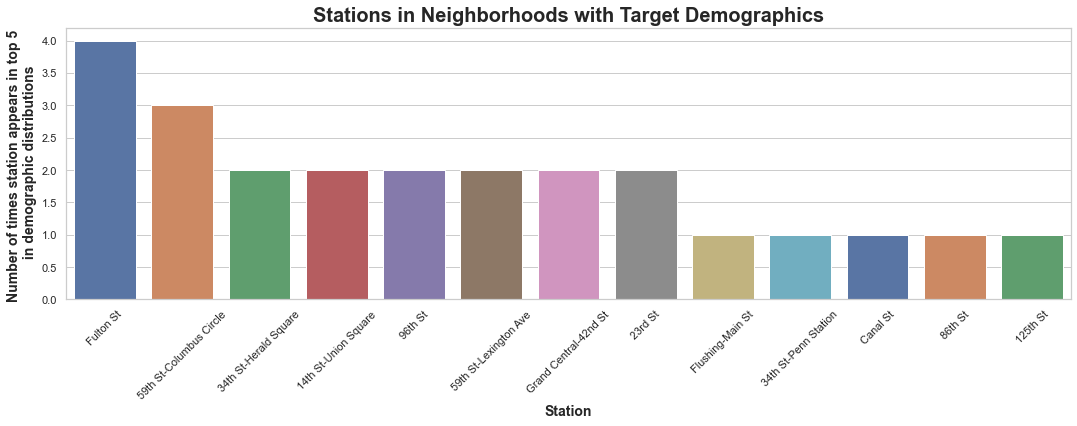

In [219]:
top_5_stations.sort_values(by='frequency', ascending=False, inplace=True)

plt.figure(figsize = [18,5])

sns.barplot(x='station', y='frequency', data=top_5_stations, palette='deep')

plt.ylabel('Number of times station appears in top 5 \n in demographic distributions', weight='bold', size='14')
plt.xlabel('Station', weight='bold', size='14')
plt.xticks(rotation=45)
plt.title('Stations in Neighborhoods with Target Demographics', weight='bold', size=20)

plt.savefig('top5.png', dpi=500, bbox_inches='tight')